In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
# import pickle as pkl
from joblib import load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/[LATEST] Manish New Data/processedData.csv")
data = pd.read_csv("/content/drive/MyDrive/processedData.csv")

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.555556,0.183673,0.731019,0.730159,-0.42215,0.067219,-0.106941,0.769231,0.487179,0.521220,0.521220,0.2,0.0,0.8,-1.161442,-1.101543,0.589168,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,179300
1,0.555556,0.183673,0.637336,0.571429,-0.42215,-10.650685,10.653853,0.769231,0.487179,0.735954,0.735954,0.2,0.0,0.4,-1.237048,0.879733,-0.749912,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0,210500
2,0.555556,0.183673,0.487877,0.222222,-0.42215,0.068531,-0.107635,0.230769,0.474359,0.682270,0.682270,0.2,0.0,0.2,-1.237048,0.879733,0.589168,0.70620,0.317929,0.25,1.0,1.0,0.0,0.0,251400
3,0.555556,0.183673,0.212180,0.650794,-0.42215,0.067796,-0.107374,0.769231,0.487179,0.574903,0.574903,0.2,0.0,1.0,-1.237048,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,1.0,0.0,0.0,215400
4,0.555556,0.183673,0.198748,0.650794,-0.42215,0.067623,-0.107263,0.769231,0.474359,1.326472,1.326471,0.2,0.0,0.6,-0.783414,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,191800


In [ ]:
data.describe()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
count,217493.000000,2.174930e+05,217493.000000,217493.000000,2.174930e+05,2.174930e+05,2.174930e+05,217493.000000,217493.000000,2.174930e+05,2.174930e+05,217493.000000,217493.000000,217493.000000,2.174930e+05,2.174930e+05,2.174930e+05,2.174930e+05,2.174930e+05,217493.000000,217493.000000,217493.000000,217493.000000,217493.0,217493.000000
mean,0.529738,1.836735e-01,0.506782,0.463812,-1.171986e-14,4.772956e-16,2.284249e-15,0.747868,0.639687,7.363512e-16,3.809764e-15,0.231979,0.057978,0.528628,-2.872402e-15,2.904244e-15,-6.701133e-15,2.732886e-15,3.567398e-15,0.252648,0.999724,0.824762,0.078738,0.0,229375.185408
std,0.225287,8.984223e-13,0.287989,0.292701,1.000002e+00,1.000002e+00,1.000002e+00,0.112158,0.185684,1.000002e+00,1.000002e+00,0.199411,0.196396,0.215032,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.045092,0.016607,0.380171,0.269330,0.0,78522.269707
min,0.000000,1.836735e-01,0.000000,0.000000,-6.495170e-01,-1.065068e+01,-4.301423e+00,0.000000,0.000000,-1.679804e+00,-1.679801e+00,0.000000,0.000000,0.000000,-1.393880e+01,-1.101543e+00,-4.097612e+00,-3.354150e+00,-2.451505e+00,0.000000,0.000000,0.000000,0.000000,0.0,10000.000000
25%,0.333333,1.836735e-01,0.255891,0.253968,-4.474130e-01,7.343619e-02,-1.018563e-01,0.769231,0.487179,-7.671842e-01,-7.671828e-01,0.000000,0.000000,0.400000,-7.078082e-01,-1.101543e+00,-7.499121e-01,-6.472500e-01,-1.066788e+00,0.250000,1.000000,1.000000,0.000000,0.0,174600.000000
50%,0.500000,1.836735e-01,0.517473,0.253968,-4.221500e-01,9.119871e-02,-9.334145e-02,0.769231,0.525641,-1.766658e-01,-1.766649e-01,0.200000,0.000000,0.400000,1.238541e-01,8.797335e-01,-8.037202e-02,-6.472500e-01,3.179285e-01,0.250000,1.000000,1.000000,0.000000,0.0,216500.000000
75%,0.666667,1.836735e-01,0.749004,0.730159,-1.316256e-01,1.130440e-01,-8.452755e-02,0.769231,0.782051,6.285866e-01,6.285867e-01,0.400000,0.000000,0.800000,7.286993e-01,8.797335e-01,5.891681e-01,7.062001e-01,3.179285e-01,0.250000,1.000000,1.000000,0.000000,0.0,275000.000000
max,1.000000,1.836735e-01,1.000000,1.000000,3.196774e+00,4.450606e+00,1.065385e+01,1.000000,1.000000,3.044344e+00,3.044342e+00,1.000000,1.000000,1.000000,1.862784e+00,4.842287e+00,2.597788e+00,1.018035e+01,1.416510e+01,1.000000,1.000000,1.000000,1.000000,0.0,461200.000000


In [ ]:
# data.dtypes

In [ ]:
# import numpy as np
# iqr = np.quantile(data['housePrice'],0.75) - np.quantile(data['housePrice'],0.25)
# lower_out = np.quantile(data['housePrice'],0.25) - 1.5*iqr
# higher_out = np.quantile(data['housePrice'],0.75) + 1.5*iqr

# data = data[data['housePrice'] < higher_out]
# data = data[data['housePrice'] > lower_out]  
# data.describe()

In [ ]:
data.shape

(217493, 25)

In [ ]:
X = data.iloc[:, :-1]
y = data["housePrice"]

In [ ]:
print(len(X))
print(len(y))

217493
217493


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=27)

In [ ]:
print(len(X_train))
print(len(X_test))

152245
45673


In [ ]:
#rf_model = RandomForestRegressor(max_depth=45)
rf_model = RandomForestRegressor(max_depth=23)

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=22)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
train_pred = rf_model.predict(X_train)

In [ ]:
train_r2 = round(r2_score(y_train, train_pred), 3)
print(f"Train R2: {train_r2}")

test_r2 = round(r2_score(y_test, y_pred), 3)
print(f"Test R2: {test_r2}")

Train R2: 0.963
Test R2: 0.879


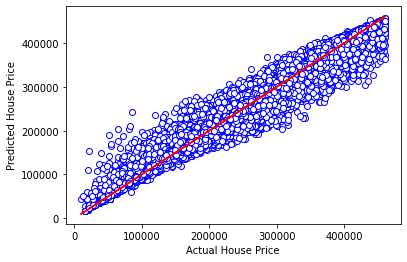

In [ ]:
plt.scatter(y_train, train_pred, c='w', edgecolors='b')
plt.plot(y_train, y_train, c='r')
plt.xlabel(f"Actual House Price")
plt.ylabel(f"Predicted House Price")
plt.savefig("Training Regression Calibration Plot.png", dpi=300)
plt.show()

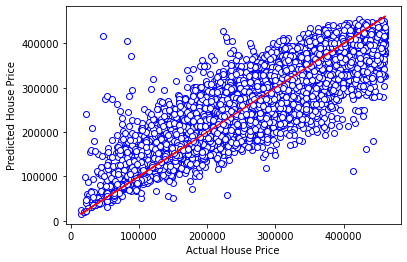

In [ ]:
plt.scatter(y_test, y_pred, c='w', edgecolors='b')
plt.plot(y_test, y_test, c='r')
plt.xlabel(f"Actual House Price")
plt.ylabel(f"Predicted House Price")
plt.savefig("Validation Regression Calibration Plot.png", dpi=300)
plt.show()

In [ ]:
test_data = np.array([0.55,	0.183673,	0.923261,	0.215385,	-0.427413,	0.074450,	-0.108367,	0.8125,	0.494253,	-0.006187,	-0.006187,	0.4, 0.0,	1.0,	-1.726204,	-1.107412,	-0.742096,	0.573321,	-1.007371,	0.25,	1.0,	0.0,	0.0,	0.0])

In [ ]:
rf_model.predict([test_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([180763.5])

In [ ]:
X_train

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
52265,0.333333,0.183673,0.708480,0.253968,-0.112678,0.098366,-0.105545,0.769231,0.974359,-1.142969,-1.142967,0.0,0.00,0.4,0.350671,0.879733,-0.749912,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0
7593,0.777778,0.183673,0.764143,0.904762,-0.137941,0.103400,-0.118063,0.230769,0.487179,0.199119,0.199119,0.0,0.75,0.2,-0.934625,0.879733,1.928248,0.70620,0.317929,0.25,1.0,1.0,0.0,0.0
38329,0.222222,0.183673,0.794422,0.619048,2.558884,0.135918,-0.085029,0.769231,0.487179,1.433839,1.433838,0.0,0.00,0.4,0.199460,-1.101543,-0.080372,0.70620,0.317929,0.25,1.0,1.0,0.0,0.0
154942,0.833333,0.183673,0.515083,0.222222,-0.226362,0.074818,-0.090003,0.769231,0.487179,1.648573,1.648572,0.0,0.00,0.4,-0.632203,-1.101543,-1.419452,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0
152474,0.777778,0.183673,0.606375,0.222222,-0.137941,0.101866,-0.119874,0.230769,0.487179,0.199119,0.199119,0.2,0.00,0.2,-0.707808,0.879733,-0.080372,0.70620,1.702645,0.25,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196408,0.500000,0.183673,0.069437,0.222222,-0.441097,0.076645,-0.100671,0.230769,0.974359,-0.767184,-0.767183,0.4,0.00,0.2,-0.254174,0.879733,-0.080372,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0
14879,0.777778,0.183673,0.559590,0.142857,-0.137941,0.094836,-0.121046,0.846154,0.974359,-1.089285,-1.089283,0.2,0.00,0.8,-0.254174,0.879733,-2.088992,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0
36680,0.500000,0.183673,0.213546,0.222222,-0.441097,0.089597,-0.101876,0.846154,0.833333,-1.572437,-1.572434,0.2,0.00,0.8,-1.463865,0.879733,-1.419452,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0
118456,0.555556,0.183673,0.637336,0.571429,-0.422150,-10.650685,10.653853,0.769231,0.487179,0.574903,0.574903,0.2,0.00,1.0,-1.161442,-1.101543,-0.080372,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0


In [ ]:
X_train.describe()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
count,152245.000000,1.522450e+05,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.000000,152245.00000,152245.0
mean,0.529684,1.836735e-01,0.507314,0.463617,0.001305,0.001166,-0.001146,0.748015,0.639802,-0.000466,-0.000466,0.232354,0.058077,0.528557,0.001763,0.001905,0.001035,0.004081,0.000893,0.252640,0.999750,0.824789,0.07861,0.0
std,0.225279,5.834519e-13,0.287822,0.292860,1.001413,0.993933,0.993926,0.111755,0.185717,1.000896,1.000896,0.199799,0.196600,0.214977,1.000407,1.000386,1.000393,1.001089,1.001591,0.045093,0.015797,0.380149,0.26913,0.0
min,0.000000,1.836735e-01,0.000000,0.000000,-0.649517,-10.650685,-4.301423,0.000000,0.000000,-1.679804,-1.679801,0.000000,0.000000,0.000000,-13.938799,-1.101543,-4.097612,-3.354150,-2.451505,0.000000,0.000000,0.000000,0.00000,0.0
25%,0.333333,1.836735e-01,0.256915,0.253968,-0.447413,0.073455,-0.101829,0.769231,0.487179,-0.767184,-0.767183,0.000000,0.000000,0.400000,-0.707808,-1.101543,-0.749912,-0.647250,-1.066788,0.250000,1.000000,1.000000,0.00000,0.0
50%,0.500000,1.836735e-01,0.517928,0.253968,-0.422150,0.091176,-0.093321,0.769231,0.525641,-0.176666,-0.176665,0.200000,0.000000,0.400000,0.123854,0.879733,-0.080372,-0.647250,0.317929,0.250000,1.000000,1.000000,0.00000,0.0
75%,0.666667,1.836735e-01,0.749345,0.730159,-0.131626,0.113071,-0.084550,0.769231,0.782051,0.628587,0.628587,0.400000,0.000000,0.800000,0.728699,0.879733,0.589168,0.706200,0.317929,0.250000,1.000000,1.000000,0.00000,0.0
max,1.000000,1.836735e-01,1.000000,1.000000,3.196774,4.450606,10.653853,1.000000,1.000000,3.044344,3.044342,1.000000,1.000000,1.000000,1.862784,4.842287,2.597788,7.473450,14.165098,1.000000,1.000000,1.000000,1.00000,0.0


In [ ]:
for i in range(20):
  test_data = X_val.iloc[i]
  pred = rf_model.predict([test_data])
  print(pred)
  print(f"{y_val.iloc[i]}\n")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

[269364.22901084]
260300

[156527.44929657]
154600

[152087.69192131]
159100

[293369.52797203]
294500

[138579.75324814]
184500

[322538.]
313600

[156353.06928992]
164600

[201813.03711209]
189300

[159578.10597358]
146400

[199135.27302532]
189400

[197700.74912532]
128500

[187965.07680866]
182900

[288829.86774438]
275200

[300351.45269706]
335900

[247150.52358517]
262600

[319668.6169682]
314600

[204279.64133799]
206700

[193915.51701936]
192900

[130822.46825225]
112200

[355601.96290385]
331600



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

In [ ]:
test_data = X_val.iloc[9]
print(test_data)

city                  0.555556
state                 0.183673
street                0.130222
streetSuffix          0.984127
zip                  -0.422150
latitude              0.070269
longitude            -0.101630
landUseDescription    0.769231
zoningDescription     0.487179
lotSizeAcres          0.467536
lotSizeSquareFeet     0.467536
lotTopography         0.000000
condition             0.000000
architecturalStyle    1.000000
yearBuilt            -1.841893
totalStories         -1.101543
totalRooms           -0.080372
bedrooms             -0.647250
baths                -1.066788
heating               0.250000
airConditioning       1.000000
foundation            1.000000
fireplace             0.000000
soldYear              0.000000
Name: 54916, dtype: float64


In [ ]:
test_label = y_val.iloc[5]
print(test_label)

313600


In [ ]:
city = "Lilburn"
state = "GA"
street = "Rockbridge"
streetSuffix = "Rd"
zip	= 30047
latitude = 33.86
longitude =	-84.1462
landUseDescription = "Single Family Residential" 
zoningDescription = "R100-Single Family Residence"
lotSizeSquareFeet =	18295.2
lotSizeAcres = 0.42
lotTopography = "Level Grade"
condition	= "Average"
architecturalStyle = "Others" 
yearBuilt	= 1979
totalStories = 1
totalRooms = 8
bedrooms = 3
baths = 2
heating = "Forced air"
airConditioning = "Yes"
foundation = "Crawl Space/Raised"
fireplace = "Masonry"
soldYear = 2021

In [ ]:
input_features = ["Lilburn", "GA", "Rockbridge", "Rd", 30047, 33.86, -84.1462, "Single Family Residential", "R100-Single Family Residence", 
18295.2, 0.42, "Level Grade", "Average", "Others", 1979, 1, 8, 3, 2, "Forced air", "Yes", "Crawl Space/Raised", "Masonry", 2021]

In [ ]:
import json

file_path = "/content/drive/MyDrive/[LATEST] Manish New Data/encodings_database.json"
file = open(file_path, "r")
encodings_database = json.load(file)

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/[LATEST] Manish New Data/test_data.csv")

In [ ]:
user_data = test_data.iloc[:1, :]

In [ ]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,Lilburn,GA,Village Green,Ct,30047,33.873543,-84.117197,Single Family Residential,R100-Single Family Residence,0.46,20037.6,Low Elevation,Average,Ranch/Rambler,1971,1,6,4,2,Forced air,Yes,Crawl Space/Raised,Masonry,2021


In [ ]:
categorical_cols = ["city", "state", "street", "streetSuffix", "landUseDescription", "zoningDescription", "lotTopography", "architecturalStyle", "condition", "heating", "airConditioning",	"foundation", "fireplace"]
numerical_cols = ["zip", "latitude", "longitude", "lotSizeAcres",	"lotSizeSquareFeet",	"yearBuilt",	"totalStories",	"totalRooms",	"bedrooms",	"baths", "soldYear"]

In [ ]:
user_data["city"]

0    Lilburn
Name: city, dtype: object

In [ ]:
for i, name in enumerate(categorical_cols):
  user_data[name] = encodings_database[name][user_data[name].values[0].lower()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,11,9,8470,14,30047,33.873543,-84.117197,13,43,0.46,20037.6,2,0,5,1971,1,6,4,2,1,1,0,0,2021


We simluate the integration with frontend, assuming that the user data is present in the CSV file.

In [ ]:
filename = "/content/drive/MyDrive/[LATEST] Manish New Data/minMaxScalar.joblib"
minMaxScalar = load(filename)

In [ ]:
categorical_cols

['city',
 'state',
 'street',
 'streetSuffix',
 'landUseDescription',
 'zoningDescription',
 'lotTopography',
 'architecturalStyle',
 'condition',
 'heating',
 'airConditioning',
 'foundation',
 'fireplace']

In [ ]:
user_data = user_data.apply(pd.to_numeric, errors="coerce")

In [ ]:
# NORMALIZATION:
# Now we will be using MinMax Scalar for the Categorical Features
categorical_cols.remove("state")
categorical_data = user_data[categorical_cols]

user_data[categorical_cols] = minMaxScalar.transform(categorical_data)

In [ ]:
user_data["state"] = user_data["state"]/49  # For state: Min: 0, Max: 49

In [ ]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,0.55,0.183673,0.923261,0.215385,30047,33.873543,-84.117197,0.8125,0.494253,0.46,20037.6,0.4,0.0,1.0,1971,1,6,4,2,0.25,1.0,0.0,0.0,2021


In [ ]:
filename = "/content/drive/MyDrive/[LATEST] Manish New Data/standardScalar.joblib"
standardScalar = load(filename)

In [ ]:
numerical_data = user_data[numerical_cols]

user_data[numerical_cols] = standardScalar.transform(numerical_data)

In [ ]:
user_data

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear
0,0.55,0.183673,0.923261,0.215385,-0.427423,0.074451,-0.10837,0.8125,0.494253,-0.006182,-0.006182,0.4,0.0,1.0,-1.726295,-1.10741,-0.742079,0.573313,-1.007367,0.25,1.0,0.0,0.0,0.0


In [ ]:
#user_data = user_data.drop(columns="housePrice")

In [ ]:
user_data.values

array([[ 0.55      ,  0.18367347,  0.92326139,  0.21538462, -0.42742254,
         0.07445148, -0.1083703 ,  0.8125    ,  0.49425287, -0.00618169,
        -0.0061816 ,  0.4       ,  0.        ,  1.        , -1.72629479,
        -1.10740983, -0.74207897,  0.57331305, -1.00736676,  0.25      ,
         1.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
rf_model.predict(user_data.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([180763.5])

In [ ]:
from joblib import dump

In [ ]:
dump(rf_model, "rf_model.joblib")

['rf_model.joblib']

In [ ]:
!cp "/content/rf_model.joblib" "/content/drive/MyDrive/[LATEST] Manish New Data/rf_model_97_87_45pruning_factor_27_random_seed.joblib"

Train R2: 0.972
Test R2: 0.871
Train R2: 0.983
Test R2: 0.881

[195566.]
189000

[325186.]
343500

[207597.]
192400

[165890.]
158100

[232491.]
197200

[343317.]
307300

[164818]
169200

[238842.]
210500

[269515.]
245600

[225186.]
229600

[214557.]
178300

[436763.]
597800

[197238.]
250900

[203670.]
181100

[206606.]
227100

[247702]
249500

[259625.]
231600

[213160.]
173600

[266160.]
265000

[325485.]
360000


after outlier removal


[270110.]
260300

[144742.]
154600

[153366.]
159100

[294139.]
294500

[135198.]
184500

[322564.]
313600

[153990.]
164600

[193389]
189300

[158955.]
146400

[200945.]
189400

[203527.]
128500

[186449.]
182900

[292514.]
275200

[297337.]
335900

[256282.]
262600

[315733.]
314600

[206163.]
206700

[191879.]
192900

[125729.]
112200

354304.]
331600

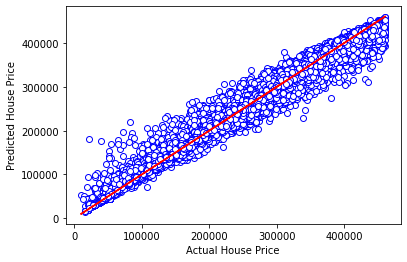

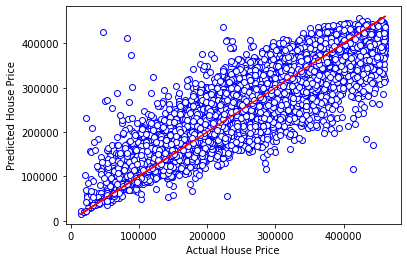